<a href="https://colab.research.google.com/github/thual/POM-ch1-oscillationDeplacement/blob/main/oscillationDeplacement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Oscillation du déplacement d'une masse fixée à un ressort

Le déplacement $\xi_1(t)$ d'une masse $m$ fixée à un ressort de raideur $k$ est régi par l'équation :
$$ \dot \xi_1 = -\omega^2 \, \xi\qquad \hbox{
avec}\qquad \omega =\sqrt{k\over m}$$
Les conditions intiales $\xi_1(0)=A$ et $\dot\xi_1(0) = V$ conduisent à la solution $\xi_1(t) = \xi_m\, \cos(\omega \, t+ \varphi)$ avec 
$$  \varphi = \arctan\left(- {A\over \omega\, V}\right) \qquad \hbox{et} \qquad \xi_m = {A\over \cos\varphi}\;.$$. 
Pour $V=0$, on a $\xi_1(t) = A\, \cos(\omega\,t)$. 

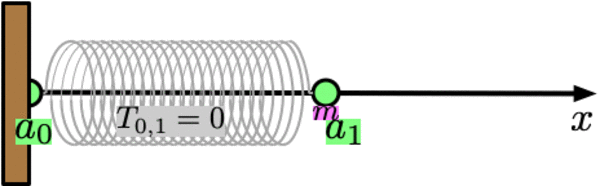

Paramètres à modifier:

*   $\textsf{k}$ : raideur $k$ du ressort (m)
*   $\textsf{m}$ : masse $m$ du ressort (kg)
*   $\textsf{A}$ : Condition initiale $\xi_1(0)$ (m)
*   $\textsf{V}$ : Condition initiale $\dot\xi_1(0)$ (m.s$^{-1}$)



omega= 1.0 T= 6.283185307179586
xim= 1.0 varphi= 0.0
Simulation pour créer un gif animé
Fichier gif animé créé : oscillation.gif

Simulation pour visualiser l'animation


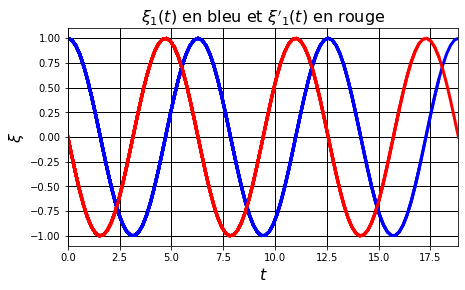

In [5]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.animation import FuncAnimation

# Paramètres physique à changer
k=1 # longueur du ressort
m=1 # masse du ressort
A=1 # condition initiale pour le déplacement (non nul)
V=0 # condition initiale pour la vitesse du déplacement

# Paramètre de la visualisation
Nperiod=3 # Nombre de periode pour la simulation
Nt=100; # Nombre de points pour la courbe
Nplot=21; # Nombre d'images

# Paramètres dérivés
Iplot=int(Nt/(Nplot-1)) # Intervalle indices entre deux image
omega=np.sqrt(k/m) # pulsation
T=2*np.pi/omega # période
tmax=Nperiod*T
varphi=np.arctan(-V/(omega*A)) # phase
xim=A/np.cos(varphi) # amplitude
print("omega=",omega,"T=",T)
print("xim=",xim,"varphi=",varphi)


# Signal
t=np.linspace(0,tmax,Nt);
xi=xim*np.cos(omega*t+varphi);
xid=-xim*omega*np.sin(omega*t+varphi)

def animate(i):
  # Function pour l'animation
  # print("i=",i,"i*Iplot=",i*Iplot)
  tplo=t[0:i*Iplot]
  xiplo=xi[0:i*Iplot]
  xidplo=xid[0:i*Iplot]
  plt.plot(tplo,xiplo,color='blue',linewidth=3)
  plt.plot(tplo,xidplo,color='red',linewidth=3)


# Figure preparation 
fig=plt.figure(2,figsize=(7,4))
line, = plt.plot([],[])
plt.xlabel(r'$t$',fontsize=16 )
plt.ylabel(r'$\xi$',fontsize=16)
plt.xlim(0,tmax)
plt.ylim(-1.1*xim,1.1*xim)
titlefig=r"$\xi_1(t)$ en bleu et $\xi'_1(t)$ en rouge"
plt.title(titlefig,fontsize=16)
plt.grid(color='black', axis='y', linestyle='-', linewidth=1)        
plt.grid(color='black', axis='x', linestyle='-', linewidth=1)        
name="oscillation"

# Animation 
ani=FuncAnimation(fig,animate,frames=Nplot,interval=Nt,repeat=True)
plt.rc('animation', html='jshtml')

# Création d'un Gif animé
name="oscillation"; namegif=name+".gif"
print("==================================")
print("Simulation pour créer un gif animé")
#ani.save(namegif,writer="pillow")
print("Fichier gif animé créé :",namegif)
print("======================================")

# Visulation animée de la simulation 
print("\nSimulation pour visualiser l'animation")
# Cette commande doit rester la dernière pour être suivie d'effet
ani
